In [1]:
import re, time, warnings, os, sys, copy
import gzip, pickle

import numpy as np
import pandas as pd
import gzip, pickle
import scipy, sklearn, mne

import auxiliary as aux
import data, rsa
sys.path.append('../spaces/')
import embeddings as emb
import pubplot as pub
import matplotlib.pyplot as plt

pub.styles.set()
C = pub.colours.equidistant('tab20c', k = 20)

## Supplementary Figure 5
This notebook produces supplementary results for B2B decoding in LLMs.

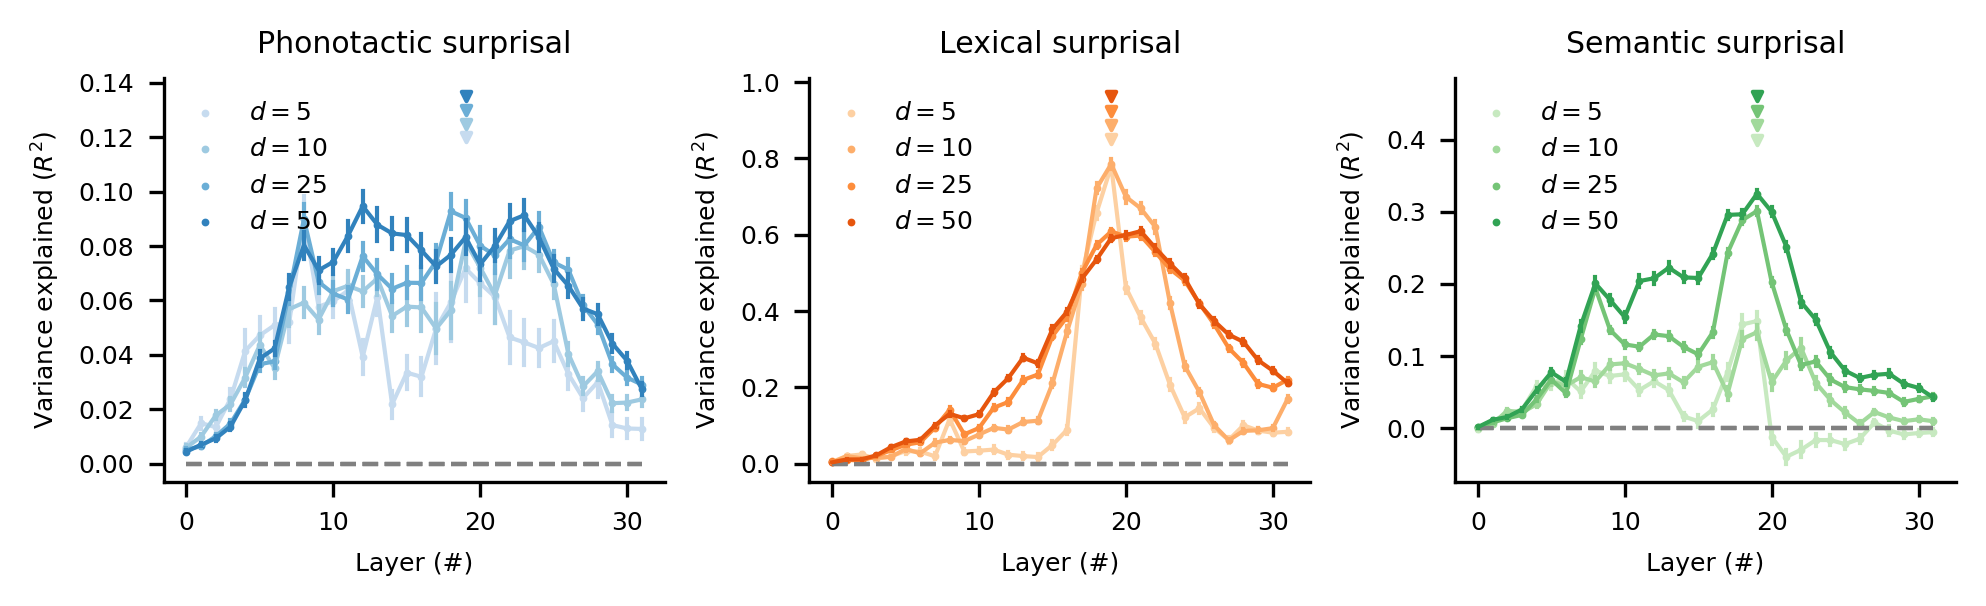

In [2]:
F = [5, 10, 25, 50]

fig, ax = pub.figure(nrows = 1, ncols = 3)

for i, f_i in enumerate(F):
    with gzip.open(f'./data/processed/w2v2/b2b_f{f_i}.pkl.gz', 'rb') as f:
        best, median, R, S, r = pickle.load(f)
    
    x = np.arange(R.shape[1] - 1)
    mu = R.mean(axis = 0)
    se = rsa.stats.bootstrap_se(R)
    
    # phonotactics
    ax[0].plot(x*0, color = 'gray', linestyle = '--')
    for j in range(x.shape[0]):
        ax[0].plot([x[j], x[j]], [mu[j+1,0] - 1.96 * se[j+1,0], mu[j+1,0] + 1.96 * se[j+1,0]], color = C[3 - i])
    ax[0].scatter(x, mu[1:,0], marker = '.', s = 3, color = C[3 - i], label = fr'$d = {f_i}$')
    ax[0].plot(x, mu[1:,0], color = C[3 - i])
    ax[0].scatter([median-1], [0.12 + i * 0.005], marker = 'v', s = 5, color = C[3 - i])
    
    # lexical
    ax[1].plot(x*0, color = 'gray', linestyle = '--')
    for j in range(x.shape[0]):
        ax[1].plot([x[j], x[j]], [mu[j+1,1] - 1.96 * se[j+1,1], mu[j+1,1] + 1.96 * se[j+1,1]], color = C[7 - i])
    ax[1].scatter(x, mu[1:,1], marker = '.', s = 3, color = C[7 - i], label = fr'$d = {f_i}$')
    ax[1].plot(x, mu[1:,1], color = C[7 - i])
    ax[1].scatter([median-1], [0.85 + i * 0.0375], marker = 'v', s = 5, color = C[7 - i])
    
    # semantic
    ax[2].plot(x*0, color = 'gray', linestyle = '--')
    for j in range(x.shape[0]):
        ax[2].plot([x[j], x[j]], [mu[j+1,2] - 1.96 * se[j+1,2], mu[j+1,2] + 1.96 * se[j+1,2]], color = C[11 - i])
    ax[2].scatter(x, mu[1:,2], marker = '.', s = 3, color = C[11 - i], label = fr'$d = {f_i}$')
    ax[2].plot(x, mu[1:,2], color = C[11 - i])
    ax[2].scatter([median-1], [0.4 + i * 0.02], marker = 'v', s = 5, color = C[11 - i])

pub.cosmetics.legend(ax = ax[0], loc = 'upper left')
pub.cosmetics.legend(ax = ax[1], loc = 'upper left')
pub.cosmetics.legend(ax = ax[2], loc = 'upper left')

ax[0].set_title(r'Phonotactic surprisal')
ax[1].set_title(r'Lexical surprisal')
ax[2].set_title(r'Semantic surprisal')
ax[0].set_ylabel(r'Variance explained ($R^2$)')
ax[1].set_ylabel(r'Variance explained ($R^2$)')
ax[2].set_ylabel(r'Variance explained ($R^2$)')
ax[0].set_xlabel(r'Layer (#)')
ax[1].set_xlabel(r'Layer (#)')
ax[2].set_xlabel(r'Layer (#)')

pub.cosmetics.finish()

fig.savefig(f'./figures/png/suppfig5_llm.png', dpi = 300)
fig.savefig(f'./figures/svg/suppfig5_llm.svg')
fig.savefig(f'./figures/pdf/suppfig5_llm.pdf')

In [3]:
best, median

('transformer_L12', 20)